In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

1.2 Loading data

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 54s 0us/step


In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

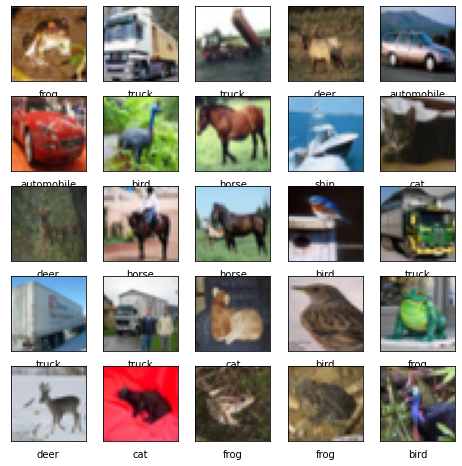

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


1.3 Create the convolutional base

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-09-06 18:49:39.466317: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

1.4 Adding Dense Layers on the top

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

1.5 Compile and train the model¶

In [12]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5103 - accuracy: 0.4512 - val_loss: 1.3143 - val_accuracy: 0.5238
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1455 - accuracy: 0.5936 - val_loss: 1.1106 - val_accuracy: 0.6054
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9940 - accuracy: 0.6483 - val_loss: 0.9887 - val_accuracy: 0.6541
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8995 - accuracy: 0.6848 - val_loss: 0.9397 - val_accuracy: 0.6736
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8318 - accuracy: 0.7082 - val_loss: 0.9650 - val_accuracy: 0.6645
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7777 - accuracy: 0.7269 - val_loss: 1.0056 - val_accuracy: 0.6626
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7245 - accuracy: 0.7456 - val_loss: 0.8622 -

1.6 Evaluate the model

313/313 - 2s - loss: 0.8738 - accuracy: 0.7070 - 2s/epoch - 5ms/step


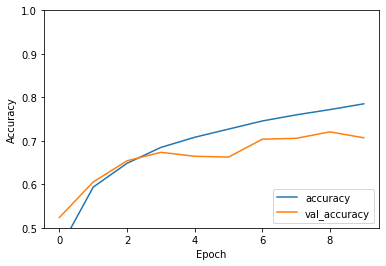

In [13]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [14]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7070000171661377


In [16]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False